# Pareto front

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!wget 34.125.99.209/generation_100.csv

--2023-08-23 04:14:24--  http://34.125.99.209/generation_100.csv
Connecting to 34.125.99.209:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5467792 (5.2M) [application/octet-stream]
Saving to: ‘generation_100.csv’

generation_100.csv  100%[===================>]   5.21M  8.86MB/s    in 0.6s    

2023-08-23 04:14:24 (8.86 MB/s) - ‘generation_100.csv’ saved [5467792/5467792]



In [ ]:
columns_to_read = [0, 1, 2, 3, 4, 5]
df_paretoFront = pd.read_csv('/content/generation_100.csv', header=0, usecols=columns_to_read, index_col=False)

In [ ]:
df_paretoFront[df_paretoFront['Rank'] == 0]

,Score0,Score1,Score2,Rank,Distance,Phenotype
0,0.277048,0.330778,0.303913,0,inf,protected_log(protected_log(((((sin(protected_...
1,0.942706,0.000000,0.471353,0,inf,"ifLessThan(Dim[i][113], Dim[i][92], Dim[i][45]..."
2,0.000000,0.979131,0.489566,0,inf,protected_log(protected_log((protected_log(((D...
3,0.356957,0.251846,0.304401,0,0.064160,protected_log(protected_log((Dim[i][8]*protect...
4,0.265922,0.342561,0.304242,0,0.052605,protected_log(protected_log((protected_sqrt(if...
...,...,...,...,...,...,...
995,0.912290,0.000994,0.456642,0,0.000000,"ifLessThan(Dim[i][113], Dim[i][92], Dim[i][45]..."
996,0.912290,0.000994,0.456642,0,0.000000,"ifLessThan(Dim[i][113], Dim[i][92], Dim[i][45]..."
997,0.912290,0.000994,0.456642,0,0.000000,"ifLessThan(Dim[i][113], Dim[i][92], Dim[i][45]..."
998,0.912290,0.000994,0.456642,0,0.000000,"ifLessThan(Dim[i][113], Dim[i][92], Dim[i][45]..."


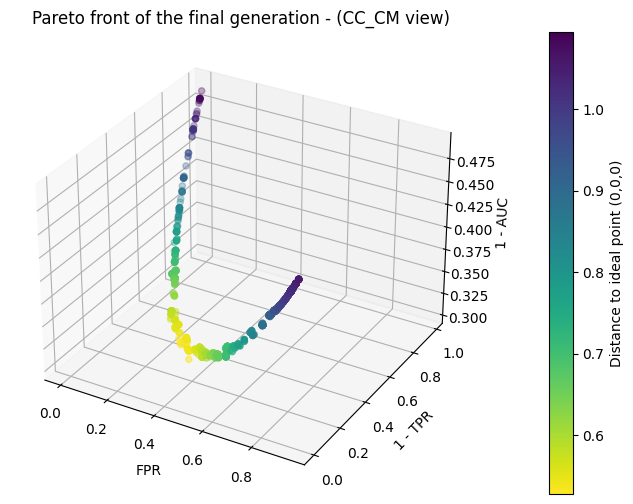

In [ ]:


# Assume df_paretoFront is your DataFrame containing the data
# df_paretoFront = pd.DataFrame(...)

# Extract the data
X = df_paretoFront['Score0']
Y = df_paretoFront['Score1']
Z = df_paretoFront['Score2']

# Compute the color values based on X^2 + Y^2 + Z^2
colors = ((X**2 + Y**2 + Z**2))**(1/2)

# Create a figure
fig = plt.figure(figsize=(20,6))

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
sc = ax.scatter(X, Y, Z, c=colors, cmap='viridis_r')

# Name the axes
ax.set_xlabel('FPR')
ax.set_ylabel('1 - TPR')
ax.set_zlabel('1 - AUC')

# Add color bar
fig.colorbar(sc, ax=ax, label='Distance to ideal point (0,0,0)')

plt.title('Pareto front of the final generation - (CC_CM view)')
plt.show()


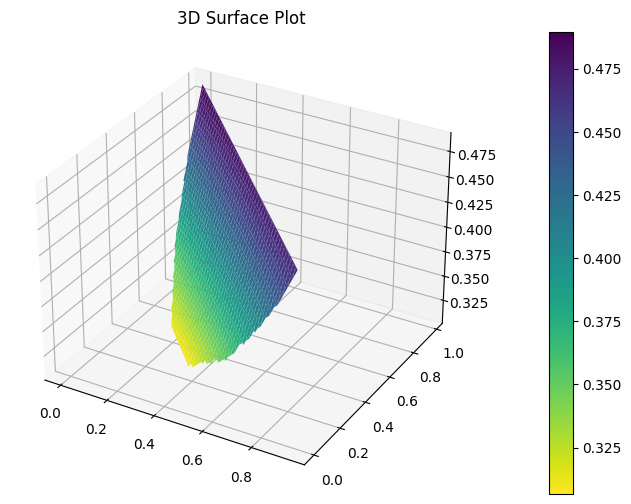

In [ ]:
from scipy.interpolate import griddata

# Extract the data
X = df_paretoFront['Score0']
Y = df_paretoFront['Score1']
Z = df_paretoFront['Score2']

# Create a grid
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((X, Y), Z, (xi, yi), method='linear')

# Create a figure
fig = plt.figure(figsize=(20,6))

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis_r')

# Add color bar
fig.colorbar(surf)

plt.title('3D Surface Plot')
plt.show()